## Movielens

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [5]:
import pandas as pd

In [2]:
import numpy as np

Data available from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
path='data/ml-latest-small/'

Read the ratings data from a CSV in the path above into the path referenced above. Display the head of the data just to see what it looks like.

In [6]:
ratings = pd.read_csv(path+'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Do the same thing with the movie data.

In [7]:
movies = pd.read_csv(path+'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Create a crosstab of the most-rated movies and the most frequently rating users. The values of the crosstab should be the rating that that user gave that movie.

In [31]:
top_rated_movies

,userId,rating,timestamp
movieId,,,
356,329,329,329
318,317,317,317
296,307,307,307
593,279,279,279
2571,278,278,278
260,251,251,251
480,238,238,238
110,237,237,237
589,224,224,224


In [37]:
top_rating_users = ratings.groupby('userId').count().sort_values('rating', ascending=False)[:15]
top_rated_movies = ratings.groupby('movieId').count().sort_values('rating', ascending=False)[:15]
filtered = ratings.join(top_rating_users, how='inner', on='userId', rsuffix='_r')

In [48]:
filtered = filtered.join(top_rated_movies, how='inner', on='movieId', rsuffix='_r')
iden = lambda x: x
pd.crosstab(filtered['userId'], filtered['movieId'], values=filtered['rating'], aggfunc=iden)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


In [100]:
import scipy as sp

Get a set of validation indices and set them to val_idxs. Set a variable `wd` for weight decay (2e-4 is a good starting point) and `n_factors` for the number of embedding factos (a good starting point is 50).

In [119]:
wd=2e-4
n_factors=50
val_idxs = np.random.randint(0, ratings.shape[0], ratings.shape[0]//5)

Create a collaborative filtering dataset from the ratings csv using the fastai library. Then get a learner from that dataset.

In [120]:
from fastai.collab import *

In [121]:
data = CollabDataBunch.from_df(ratings, pct_val=0.2, user_name='userId', item_name='movieId', rating_name='rating')

In [122]:
learn = collab_learner(data, n_factors=n_factors, y_range=(0,5.), wd=wd)

Fit the weights of that model with cyclical larning rates.

In [123]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


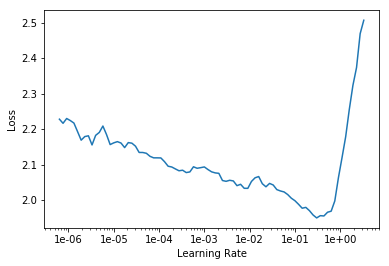

In [124]:
learn.recorder.plot()

In [125]:
fit_one_cycle(learn, cyc_len=3, max_lr=1e-2)

epoch,train_loss,valid_loss
1,0.845985,0.828629
2,0.653675,0.784575
3,0.288197,0.785665


In [126]:
# fit_one_cycle(learn, cyc_len=3, max_lr=1e-2)

Get the mean squared error from the MSE loss.

In [127]:
math.sqrt(0.785665)

0.8863774590996772

Plot a seaborn jointplot of preds v.s. actuals.

In [128]:
import seaborn as sns

In [144]:
preds

[tensor([4.6183, 4.1979, 3.0714,  ..., 4.4329, 3.9190, 4.1754]),
 tensor([5.0000, 4.0000, 3.0000,  ..., 5.0000, 4.0000, 4.5000])]

In [145]:
preds, y = learn.get_preds(DatasetType.Train)

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


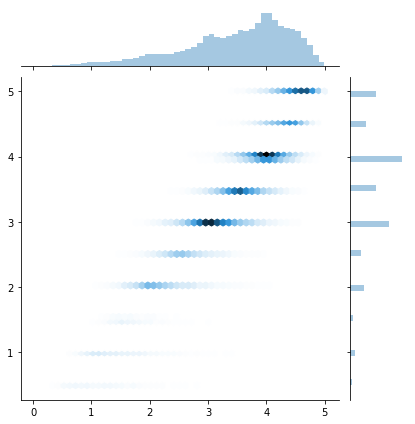

In [147]:
sns.jointplot(preds, y, kind='hex')

## Analyze results

### Movie bias

In [ ]:
movie_names = movies.set_index('movieId')['title'].to_dict()
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False).index.values[:3000]
topMovieIdx = np.array([cf.item2idx[o] for o in topMovies])

In [ ]:
m=learn.model; m.cuda()

EmbeddingDotBias (
  (u): Embedding(671, 50)
  (i): Embedding(9066, 50)
  (ub): Embedding(671, 1)
  (ib): Embedding(9066, 1)
)

First, we'll look at the movie bias term. Here, our input is the movie id (a single id), and the output is the movie bias (a single float).

In [ ]:
movie_bias = to_np(m.ib(V(topMovieIdx)))

In [ ]:
movie_bias

array([[ 0.80916],
       [ 0.85248],
       [ 1.13049],
       ..., 
       [ 0.52353],
       [-0.0782 ],
       [ 0.33268]], dtype=float32)

In [ ]:
movie_ratings = [(b[0], movie_names[i]) for i,b in zip(topMovies,movie_bias)]

Now we can look at the top and bottom rated movies. These ratings are corrected for different levels of reviewer sentiment, as well as different types of movies that different reviewers watch.

In [ ]:
sorted(movie_ratings, key=lambda o: o[0])[:15]

[(-0.96070349, 'Battlefield Earth (2000)'),
 (-0.76858485, 'Speed 2: Cruise Control (1997)'),
 (-0.73675376, 'Wild Wild West (1999)'),
 (-0.73655486, 'Anaconda (1997)'),
 (-0.72457194, 'Super Mario Bros. (1993)'),
 (-0.69564718, 'Congo (1995)'),
 (-0.67043746, 'Superman III (1983)'),
 (-0.64385736, 'Mighty Morphin Power Rangers: The Movie (1995)'),
 (-0.62750411, "Joe's Apartment (1996)"),
 (-0.60154277, 'Police Academy 4: Citizens on Patrol (1987)'),
 (-0.59929478, 'Batman & Robin (1997)'),
 (-0.59667748, 'Jaws 3-D (1983)'),
 (-0.5921765, 'Dungeons & Dragons (2000)'),
 (-0.59074384, 'Inspector Gadget (1999)'),
 (-0.57559621, 'Haunting, The (1999)')]

In [ ]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.96070349, 'Battlefield Earth (2000)'),
 (-0.76858485, 'Speed 2: Cruise Control (1997)'),
 (-0.73675376, 'Wild Wild West (1999)'),
 (-0.73655486, 'Anaconda (1997)'),
 (-0.72457194, 'Super Mario Bros. (1993)'),
 (-0.69564718, 'Congo (1995)'),
 (-0.67043746, 'Superman III (1983)'),
 (-0.64385736, 'Mighty Morphin Power Rangers: The Movie (1995)'),
 (-0.62750411, "Joe's Apartment (1996)"),
 (-0.60154277, 'Police Academy 4: Citizens on Patrol (1987)'),
 (-0.59929478, 'Batman & Robin (1997)'),
 (-0.59667748, 'Jaws 3-D (1983)'),
 (-0.5921765, 'Dungeons & Dragons (2000)'),
 (-0.59074384, 'Inspector Gadget (1999)'),
 (-0.57559621, 'Haunting, The (1999)')]

In [ ]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.3070084, 'Shawshank Redemption, The (1994)'),
 (1.1196285, 'Godfather, The (1972)'),
 (1.0844109, 'Usual Suspects, The (1995)'),
 (0.96578616, "Schindler's List (1993)"),
 (0.90921378, 'Silence of the Lambs, The (1991)'),
 (0.89407367, 'Godfather: Part II, The (1974)'),
 (0.87860429, '12 Angry Men (1957)'),
 (0.87099487, 'Pulp Fiction (1994)'),
 (0.85731125, 'Memento (2000)'),
 (0.85192037, 'Matrix, The (1999)'),
 (0.84797066, 'Dark Knight, The (2008)'),
 (0.8479442, 'To Kill a Mockingbird (1962)'),
 (0.83670187, 'Forrest Gump (1994)'),
 (0.8192088, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (0.81887919, 'Rear Window (1954)')]

### Embedding interpretation

We can now do the same thing for the embeddings.

In [ ]:
movie_emb = to_np(m.i(V(topMovieIdx)))
movie_emb.shape

(3000, 50)

Because it's hard to interpret 50 embeddings, we use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 vectors. 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [ ]:
movie_pca.shape

(3, 3000)

In [ ]:
fac0 = movie_pca[0]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac0, topMovies)]

Here's the 1st component. It seems to be 'easy watching' vs 'serious'.

In [ ]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.06748189, 'Independence Day (a.k.a. ID4) (1996)'),
 (0.061572548, 'Police Academy 4: Citizens on Patrol (1987)'),
 (0.061050549, 'Waterworld (1995)'),
 (0.057877172, 'Rocky V (1990)'),
 (0.057183612, 'Home Alone 3 (1997)'),
 (0.056849808, 'Armageddon (1998)'),
 (0.056735475, 'Miss Congeniality (2000)'),
 (0.054530937, 'Outbreak (1995)'),
 (0.053475372, 'Evolution (2001)'),
 (0.052995622, 'Pay It Forward (2000)')]

In [ ]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.078433245, 'Godfather: Part II, The (1974)'),
 (-0.072180331, 'Fargo (1996)'),
 (-0.071351372, 'Pulp Fiction (1994)'),
 (-0.068537779, 'Goodfellas (1990)'),
 (-0.067418814, 'Chinatown (1974)'),
 (-0.066787124, 'Taxi Driver (1976)'),
 (-0.06392362, 'Apocalypse Now (1979)'),
 (-0.060093477, 'Brokeback Mountain (2005)'),
 (-0.057078246, 'Godfather, The (1972)'),
 (-0.055729419, 'Player, The (1992)')]

In [ ]:
fac1 = movie_pca[1]
movie_comp = [(f, movie_names[i]) for f,i in zip(fac1, topMovies)]

Here's the 2nd component. It seems to be 'CGI' vs 'dialog driven'.

In [ ]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.058975246, 'Bonfire of the Vanities (1990)'),
 (0.055992026, '2001: A Space Odyssey (1968)'),
 (0.054682467, 'Tank Girl (1995)'),
 (0.054429606, 'Purple Rose of Cairo, The (1985)'),
 (0.050998077, 'Mulholland Drive (2001)'),
 (0.049576689, "Joe's Apartment (1996)"),
 (0.047549088, 'What Ever Happened to Baby Jane? (1962)'),
 (0.046446536, 'Island of Dr. Moreau, The (1996)'),
 (0.045140576, 'L.A. Story (1991)'),
 (0.045048587, 'Mouse Hunt (1997)')]

In [ ]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.1064609, 'Lord of the Rings: The Return of the King, The (2003)'),
 (-0.090635143, 'Aladdin (1992)'),
 (-0.089208141, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (-0.088854566, 'Star Wars: Episode IV - A New Hope (1977)'),
 (-0.085997969, 'Beauty and the Beast (1991)'),
 (-0.085541978, "Schindler's List (1993)"),
 (-0.080922142, 'Saving Private Ryan (1998)'),
 (-0.079378694,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (-0.079295151, 'Lord of the Rings: The Two Towers, The (2002)'),
 (-0.078875825, 'My Big Fat Greek Wedding (2002)')]

We can draw a picture to see how various movies appear on the map of these components. This picture shows the first two components.

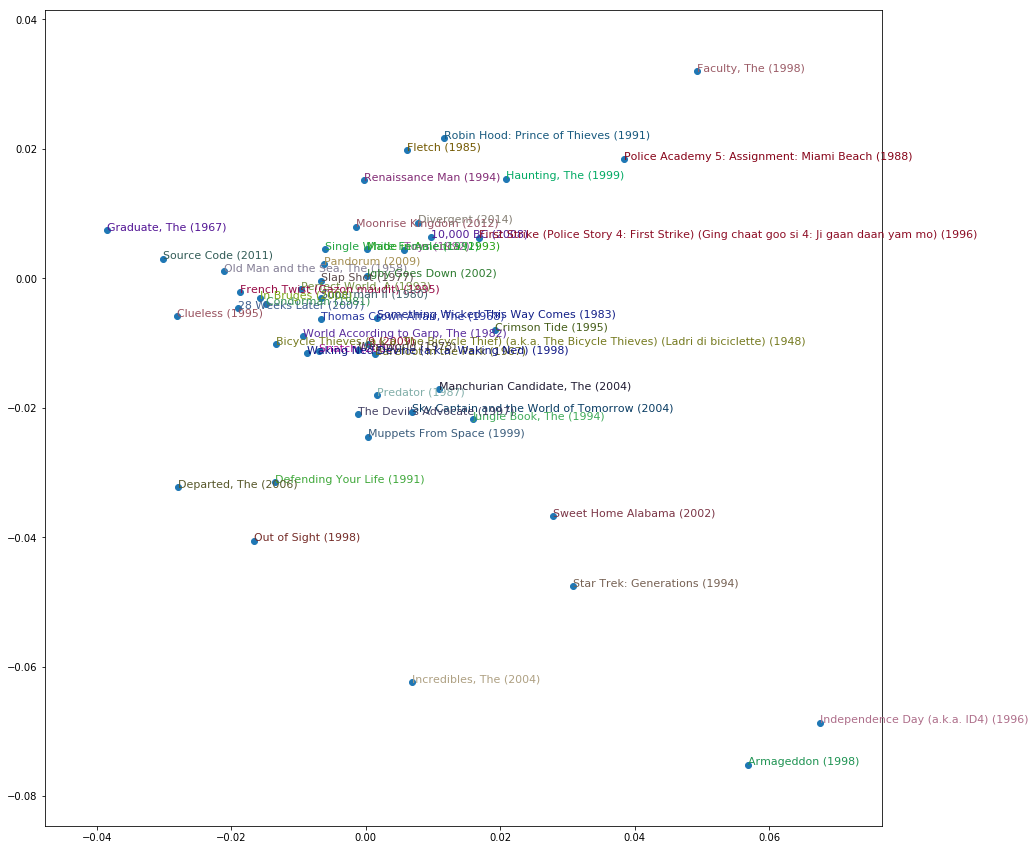

In [ ]:
idxs = np.random.choice(len(topMovies), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[idxs], X, Y):
    plt.text(x,y,movie_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

## Collab filtering from scratch

Create a pytorch matrix with values [[1,2], [3.4]], and another with values [[2,2], [10,10]].

In [ ]:
a = T([[1.,2],[3,4]])
b = T([[2.,2],[10,10]])
a,b

(
  1  2
  3  4
 [torch.FloatTensor of size 2x2], 
   2   2
  10  10
 [torch.FloatTensor of size 2x2])

Multiply the two matrices element-wise.

In [ ]:
a*b


  2   4
 30  40
[torch.FloatTensor of size 2x2]

Add the two matrices across the horizontal axis.

In [ ]:
(a*b).sum(1)


  6
 70
[torch.FloatTensor of size 2]

Put this function into a class called DotProduct. It should inherit fromnn.Module, and implement the `forward` method, which will define it's main behavior when called. 

In [ ]:
class DotProduct(nn.Module):
    def forward(self, u, m): return (u*m).sum(1)

Assign an instance of DotProduct to the variable `model`.

In [ ]:
model=DotProduct()

Call model(a,b) and assert that you get the expected answer.

In [ ]:
model(a,b)


  6
 70
[torch.FloatTensor of size 2]

### Dot product model

Assign unique and continuous integer series for users and movies in the original dataset. Assign the total number of unique users and movies to n_users, n_movies, respectively.

In [ ]:
u_uniq = ratings.userId.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.userId = ratings.userId.apply(lambda x: user2idx[x])

m_uniq = ratings.movieId.unique()
movie2idx = {o:i for i,o in enumerate(m_uniq)}
ratings.movieId = ratings.movieId.apply(lambda x: movie2idx[x])

n_users=int(ratings.userId.nunique())
n_movies=int(ratings.movieId.nunique())

Create a new class called EmbeddingDot that also inherits from nn.Module. It should create embedding layers for users and movies. It should initialize their weights uniformly between 0 and 0.05. The `forward` method should take two arguments, `cats` and `conts` (hint: we only have cats here!). It should format the output such that it is displayed row-wise. 

In [ ]:
class EmbeddingDot(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        self.u = nn.Embedding(n_users, n_factors)
        self.m = nn.Embedding(n_movies, n_factors)
        self.u.weight.data.uniform_(0,0.05)
        self.m.weight.data.uniform_(0,0.05)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        u,m = self.u(users),self.m(movies)
        return (u*m).sum(1).view(-1, 1)

Drop the `rating` and `timestamp` columns from the training data (assigned to `x`). Make `y` assigned to `rating` (and astype(np.float32)). 

In [ ]:
x = ratings.drop(['rating', 'timestamp'],axis=1)
y = ratings['rating'].astype(np.float32)

In [ ]:
Create a ColumnarModelData.from_data_frame. 

In [ ]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['userId', 'movieId'], 64)

Set wd=1e-5. Create an EmbeddingDot model, and call .cuda() on it to get it on the GPU. Create an SGD optimizer. 

In [ ]:
wd=1e-5
model = EmbeddingDot(n_users, n_movies).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

Fit the model with the data and the optimizer. Loss should be F.mse_loss. 

In [ ]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

[ 0.      1.6368  1.6415]                                      
[ 1.       1.13749  1.29373]                                   
[ 2.       0.89736  1.22818]                                    



In [ ]:
set_lrs(opt, 0.01)

In [ ]:
fit(model, data, 3, opt, F.mse_loss)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[ 0.       0.69763  1.14979]                                    
[ 1.       0.70115  1.13657]                                    
[ 2.       0.66739  1.1303 ]                                    



### Bias

In [ ]:
min_rating,max_rating = ratings.rating.min(),ratings.rating.max()
min_rating,max_rating

(0.5, 5.0)

In [ ]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

class EmbeddingDotBias(nn.Module):
    def __init__(self, n_users, n_movies):
        super().__init__()
        (self.u, self.m, self.ub, self.mb) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors), (n_users,1), (n_movies,1)
        ]]
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        um = (self.u(users)* self.m(movies)).sum(1)
        res = um + self.ub(users).squeeze() + self.mb(movies).squeeze()
        res = F.sigmoid(res) * (max_rating-min_rating) + min_rating
        return res.view(-1, 1)

In [ ]:
wd=2e-4
model = EmbeddingDotBias(cf.n_users, cf.n_items).cuda()
opt = optim.SGD(model.parameters(), 1e-1, weight_decay=wd, momentum=0.9)

In [ ]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

[ 0.       0.88212  0.83626]                                    
[ 1.       0.8108   0.81831]                                    
[ 2.       0.78864  0.80989]                                    



In [ ]:
set_lrs(opt, 1e-2)

In [ ]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

[ 0.       0.72795  0.80337]                                    
[ 1.       0.75064  0.80203]                                    
[ 2.       0.75122  0.80124]                                    



### Mini net

In [ ]:
class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_movies, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.m) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_movies, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,movies = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.m(movies)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [ ]:
wd=1e-5
model = EmbeddingNet(n_users, n_movies).cuda()
opt = optim.Adam(model.parameters(), 1e-3, weight_decay=wd)

In [ ]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

[ 0.       0.88043  0.82363]                                    
[ 1.       0.8941   0.81264]                                    
[ 2.       0.86179  0.80706]                                    



In [ ]:
set_lrs(opt, 1e-3)

In [ ]:
fit(model, data, 3, opt, F.mse_loss)

A Jupyter Widget

[ 0.       0.7669   0.78622]                                    
[ 1.       0.74277  0.78152]                                    
[ 2.       0.69891  0.78075]                                    

